In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
data = pd.read_csv("robota/vacancies.csv")
df = pd.DataFrame(data)

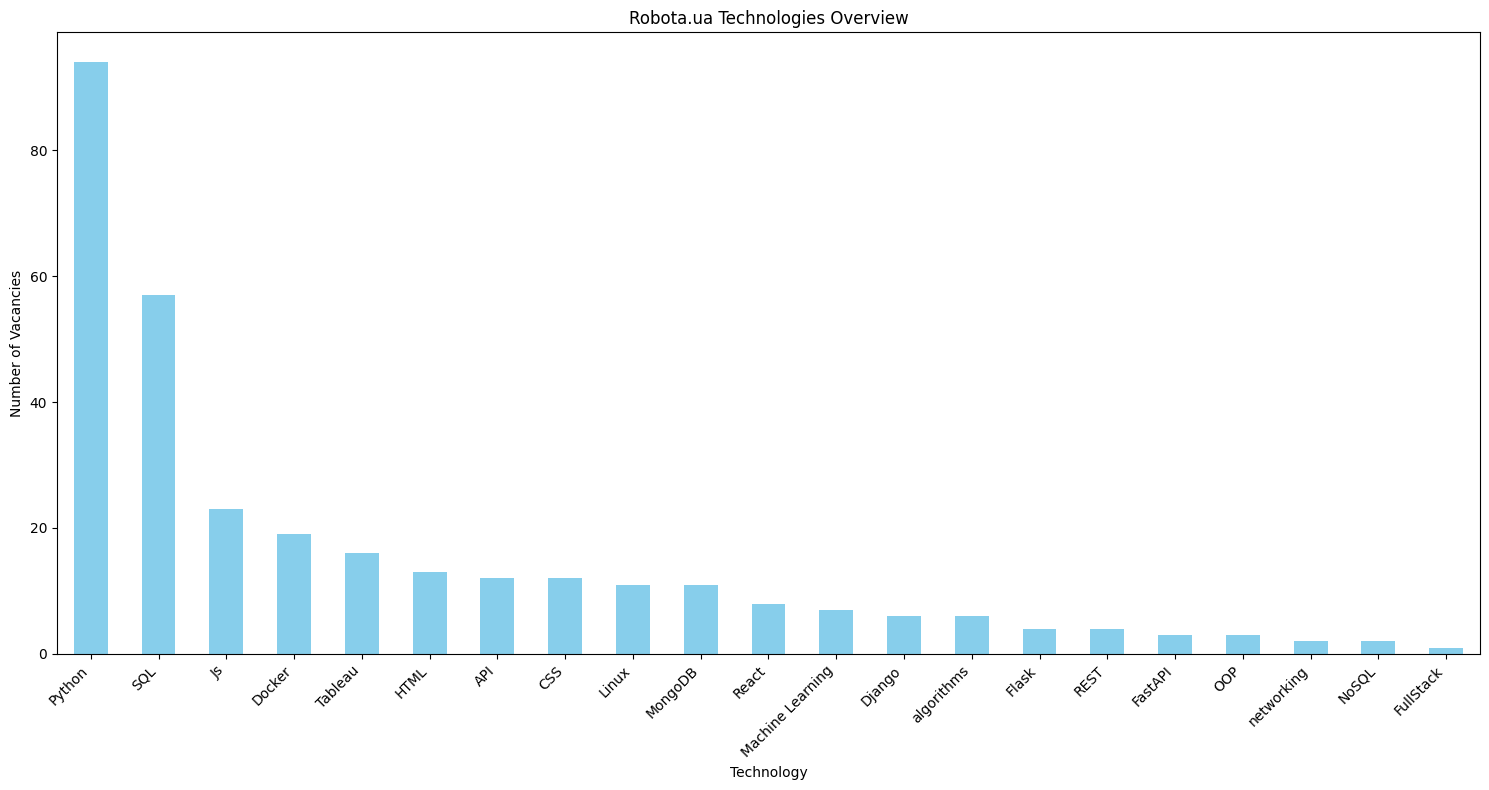

In [80]:
df["technologies"] = df["technologies"].fillna("No information")
df["technologies"] = df["technologies"].str.split(", ")
df_technologies = df.explode("technologies")
df_technologies["technologies"] = df_technologies["technologies"].str.strip()
df_technologies = df_technologies[df_technologies["technologies"] != ""]
technology_counts = df_technologies["technologies"].value_counts()

plt.figure(figsize=(15, 8))
technology_counts.plot(kind="bar", color="skyblue")
plt.title("Robota.ua Technologies Overview")
plt.xlabel("Technology")
plt.ylabel("Number of Vacancies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("data-analysis/images/top_tech.png") 
plt.show()


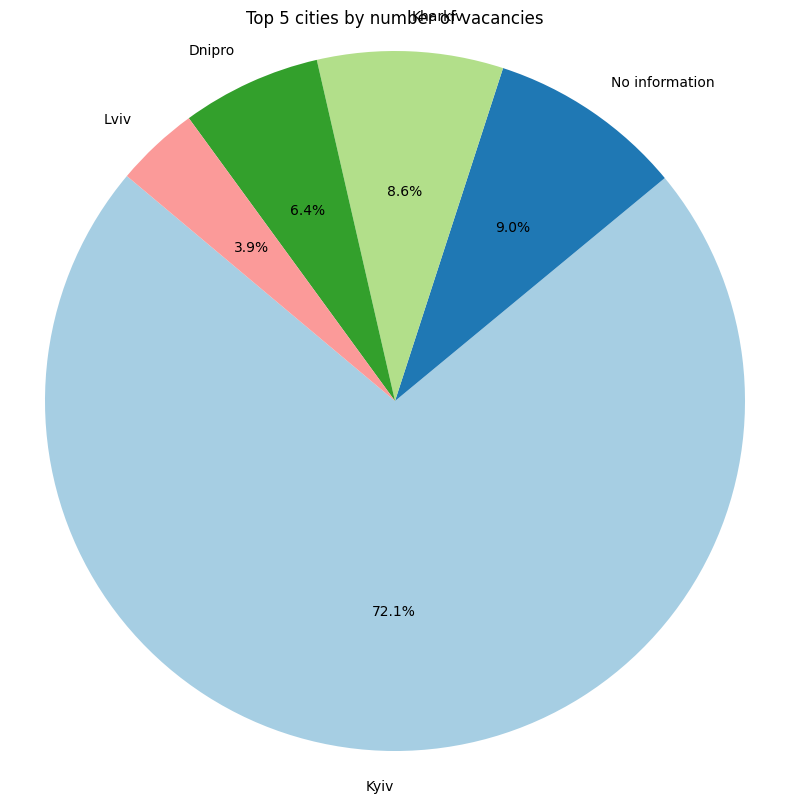

In [90]:
location_counts = df_technologies["location"].value_counts()
top_5_cities = location_counts.nlargest(5)
labels = top_5_cities.index
sizes = top_5_cities.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')

plt.yticks(rotation=45, ha='right', fontsize=10)
plt.title('Top 5 cities by number of vacancies')
plt.tight_layout()

plt.savefig("data-analysis/images/top_city.png") 

plt.show()


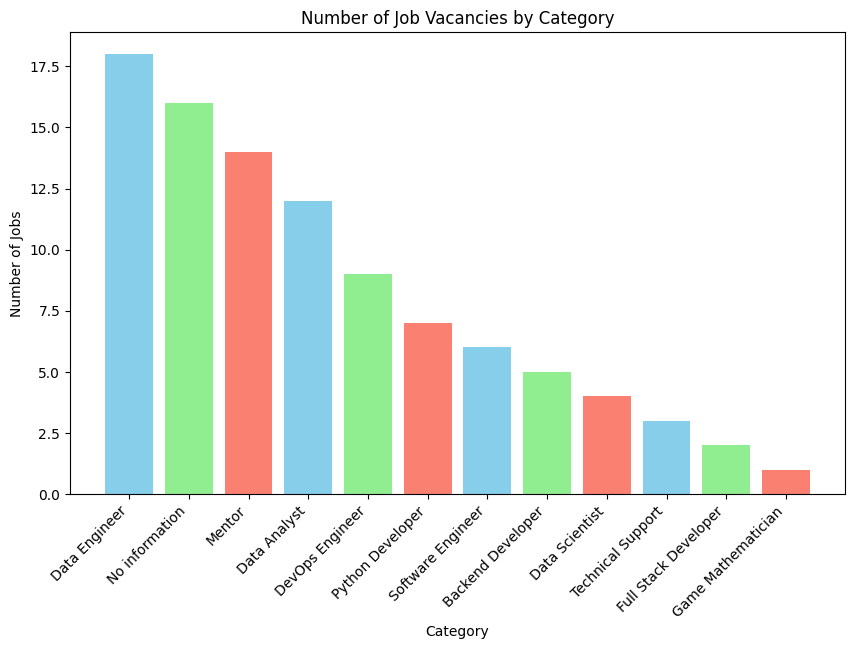

In [87]:
counts = df["title"].value_counts()
categories = counts.index


plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['skyblue', 'lightgreen', 'salmon'])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Category')
plt.ylabel('Number of Jobs')
plt.title('Number of Job Vacancies by Category')
plt.savefig("data-analysis/images/top_title.png") 
plt.show()

In [88]:
df

,title,company,location,experience,technologies,date_posted
0,Software Engineer,"Huawei Ukraine LLC / Хуавей Україна, ТОВ",Kyiv,Middle,[Python],No information
1,Technical Support,Sigma Software,Chernivtsi,Intern,"[Python, SQL, Docker, Linux, Tableau]",2024-09-11
2,No information,"Перший Український Міжнародний Банк, АТ / ПУМБ",Kyiv,Middle,"[Python, SQL, Machine Learning]",2024-09-11
3,Data Analyst,UKRSIBBANK BNP Paribas Group,Kyiv,No information,"[Python, SQL]",2024-09-11
4,No information,Genesis,Kyiv,No information,"[Python, SQL]",2024-09-11
...,...,...,...,...,...,...
92,Mentor,ITSCHOOL,Kyiv,No information,"[Js, React]",No information
93,Mentor,SitePro,Kyiv,Senior,"[Js, HTML, CSS]",No information
94,Mentor,"Stem- школа Inventor / Богатирьов О.Г., ФОП",Lviv,No information,[Python],No information
95,Software Engineer,"Беннінг Пауер Електронікс, ТОВ",Kyiv,No information,"[Python, SQL, REST, API, Docker, Django, Flask]",No information


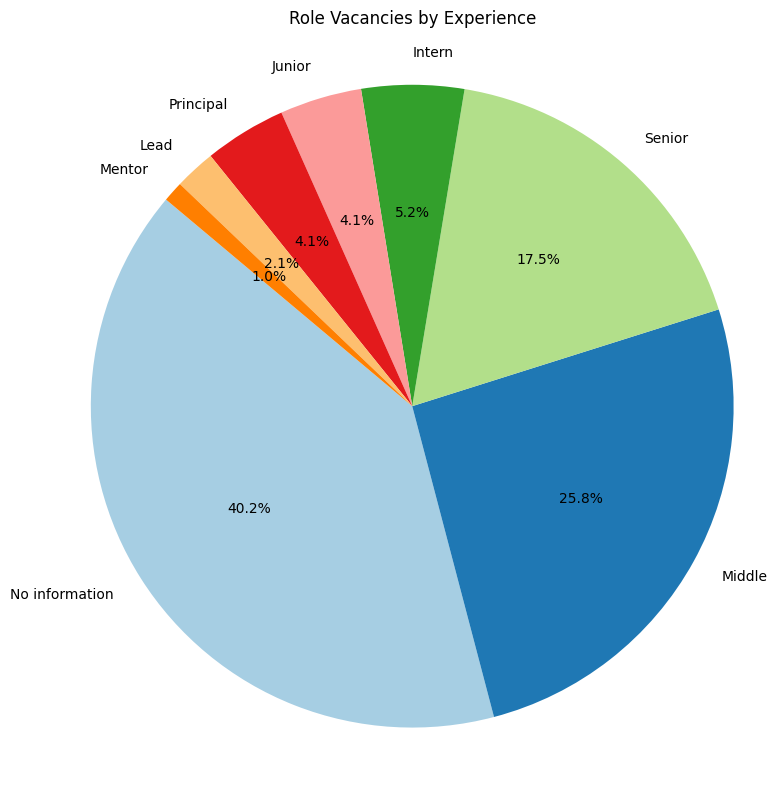

In [93]:
experience_counts = df["experience"].value_counts()

# Получаем метки (уровни опыта) и значения (количество вакансий)
labels = experience_counts.index
sizes = experience_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Сохраняем круговую форму графика
plt.axis('equal')

plt.title('Role Vacancies by Experience')
plt.tight_layout()
plt.savefig("data-analysis/images/top_roles.png")
plt.show()
plt.close()
